In [1]:
import pandas as pd
import numpy as np
                


In [2]:
dataset = "E:/Amazon Music"


In [3]:
df = pd.read_csv('single_genre_artists.csv')

In [ ]:
print(df.head())

In [5]:
print(df.shape)

(95837, 23)


In [6]:
print(df.columns)

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')


In [5]:

df['release_date'].unique()


array(['1922', '1924', '1925', ..., '1968-12-12', '1996-02-16',
       '2009-11-28'], shape=(10436,), dtype=object)

In [5]:

df.duplicated().sum()
df[df.duplicated()]                         # No Duplicate


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists


In [ ]:
print(df.dtypes)

In [6]:
print(df.isnull().sum())                # NO Null

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64


In [7]:
df.drop(columns=['id_songs', 'name_song','release_date', 'name_artists'], inplace=True)

In [8]:
df['duration_min'] = df['duration_ms'] / 60000.0

In [9]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']
X = df[features]

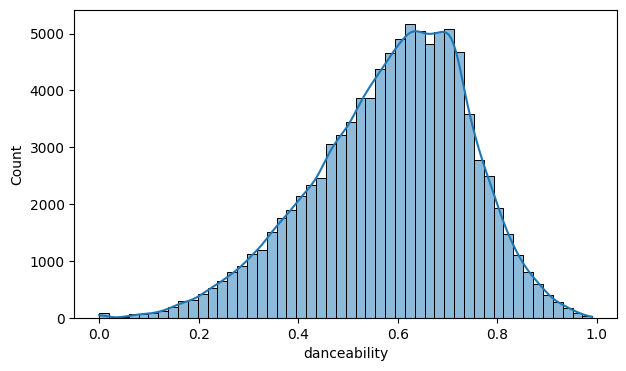

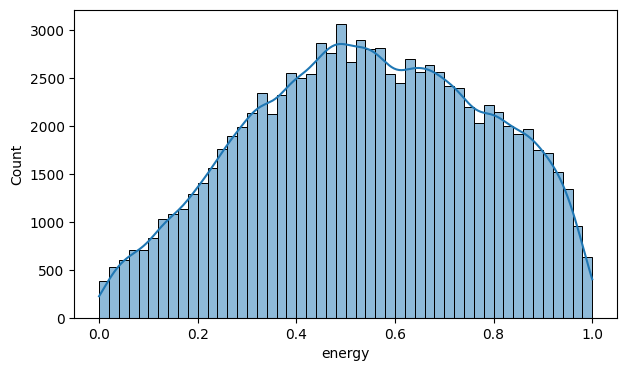

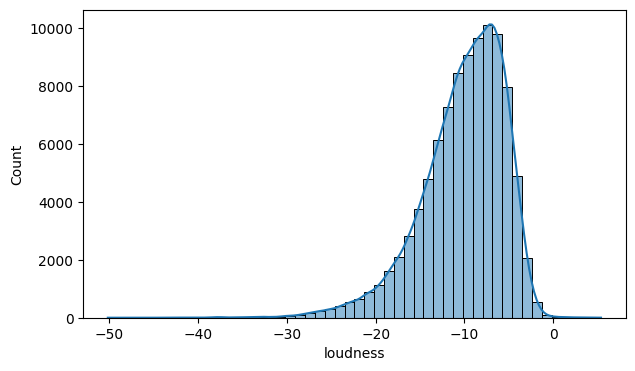

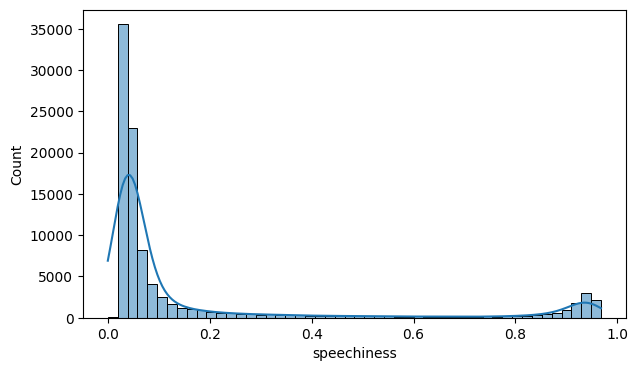

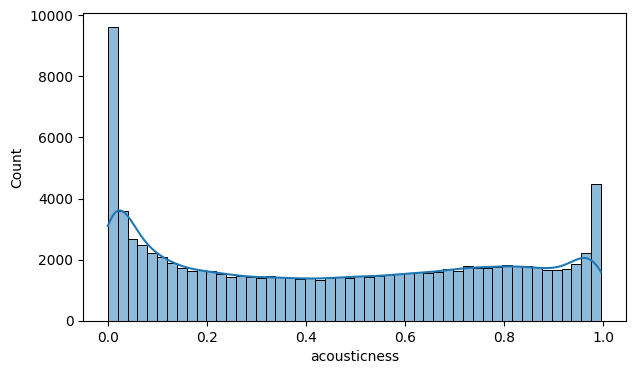

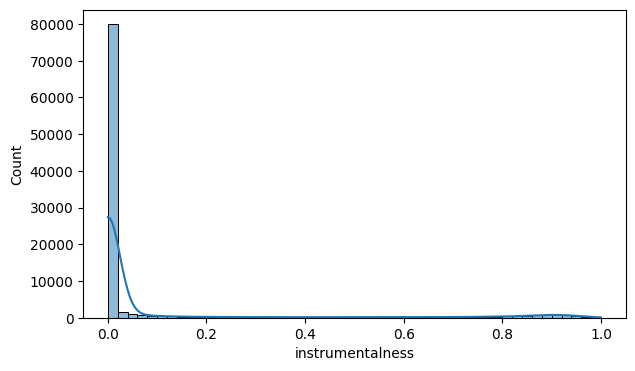

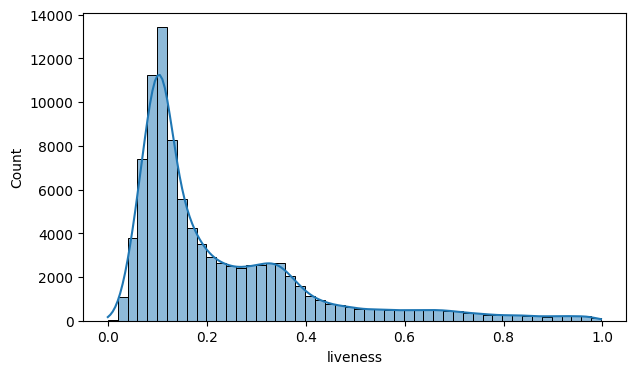

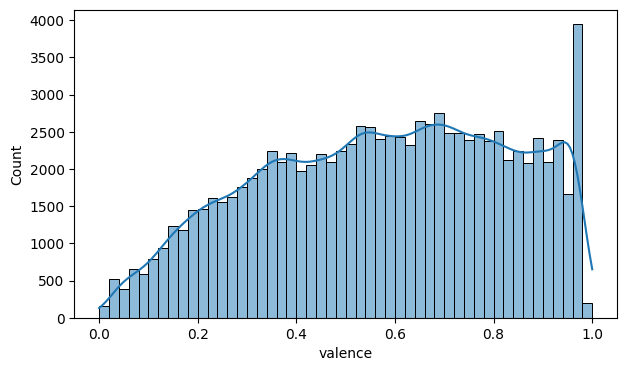

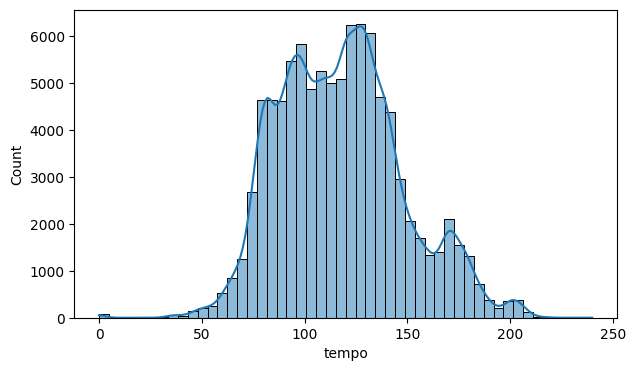

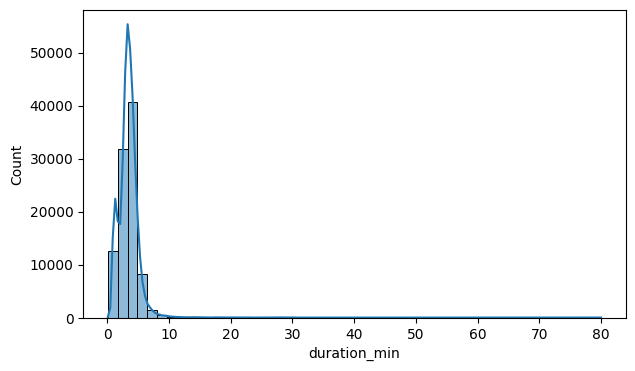

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns
for col in features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col],bins=50,kde=True)
    plt.title:(f"Histogram of {col}")
    plt.show()

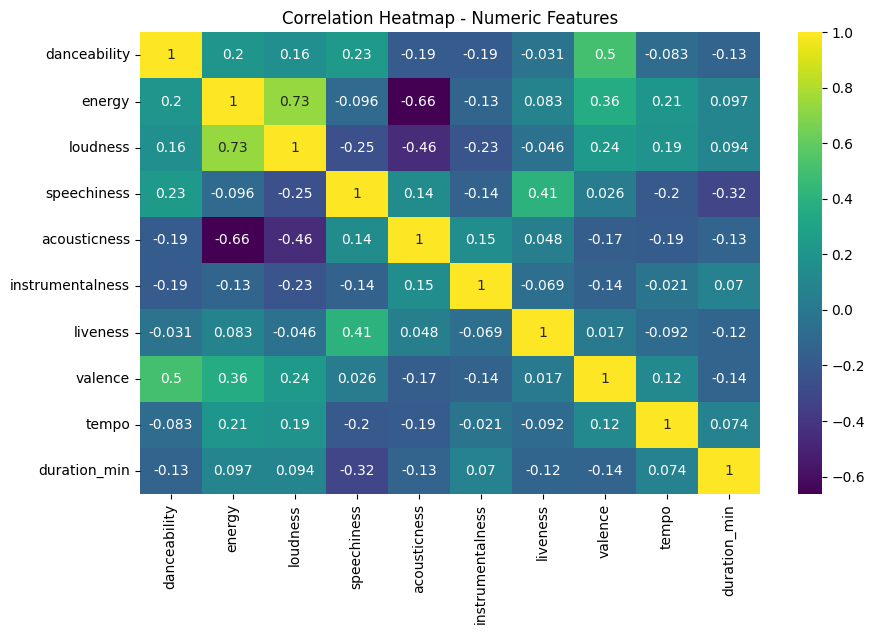

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True,cmap="viridis")
plt.title("Correlation Heatmap - Numeric Features")
plt.show()


In [ ]:
'''
fit: It looks at your data X and calculates the average (mean) and spread (standard deviation) of each column.
transform: It then changes the data so that each column has:
Mean = 0
Standard deviation = 1
So X_scaled is just your data, but rescaled.
'''
from sklearn.preprocessing import StandardScaler
                                                        #Helps machine learning models work better and more fairly in a uniform range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Example:Age might be between 20–60
#Salary might be between 20,000–100,000
#If you don’t scale them, the algorithm might think salary is way more important just because the numbers are bigger.
#Scaling makes all features comparable. 
#It ensures that algorithms like KMeans clustering, logistic regression, 
#or neural networks don’t get biased by large numbers.



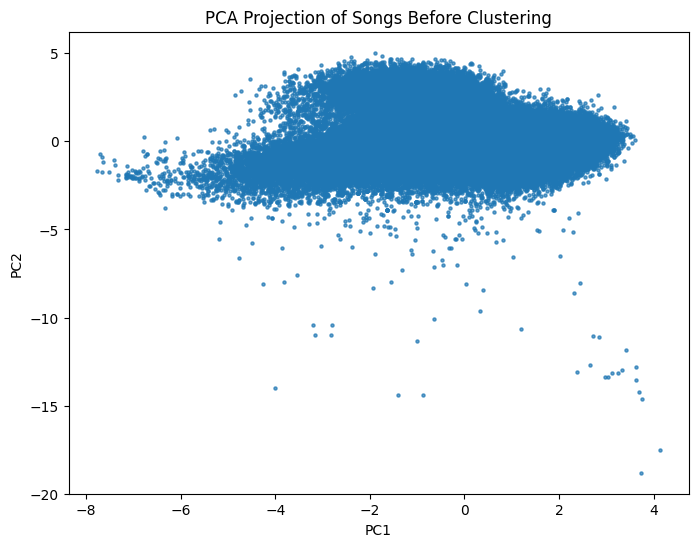

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2,random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],s=5, alpha=0.7) # s is the size of points
plt.title('PCA Projection of Songs Before Clustering')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

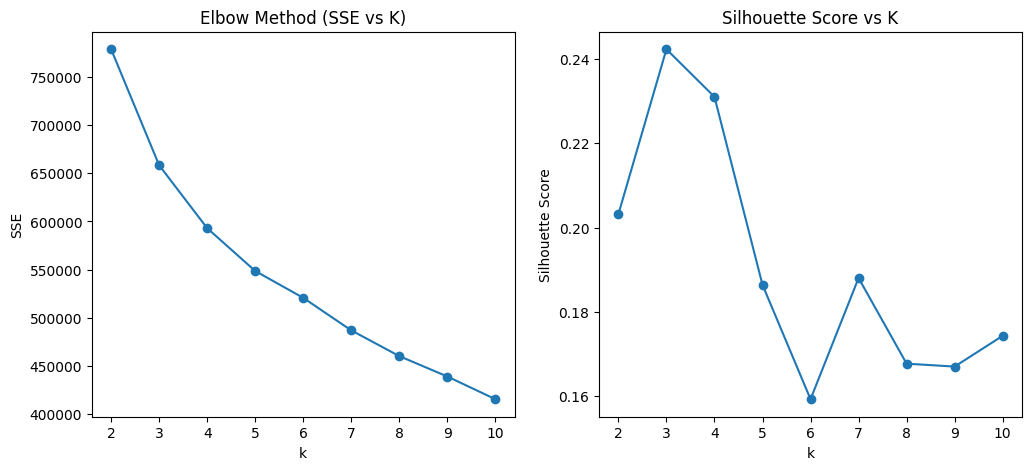

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse=[] # Sum of squared distances to closest cluster center [the lower the sse value the better the model and we chose that k value]
silhouette_scores = [] # Silhouette scores for each k
k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k,random_state=42,n_init=10) # n_init specifies the number of times the k-means algorithm will be run with different centroid seeds
    model.fit(X_scaled)
    sse.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values,sse,'-o')
plt.title("Elbow Method (SSE vs K)")
plt.xlabel("k")
plt.ylabel("SSE")

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, '-o')
plt.title("Silhouette Score vs K")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.show()
#Elbow Method: Curve flattened around k = 3
#Silhouette Score: Highest at k = 3, confirming clear separation

In [40]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'K={k}: {score:.3f}')

K=2: 0.203
K=3: 0.242
K=4: 0.231
K=5: 0.186
K=6: 0.186
K=7: 0.165
K=8: 0.172
K=9: 0.172
K=10: 0.159


In [37]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd

final_k = 3
results = []

# -----------------------------
# ✅ KMEANS
# -----------------------------
kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=20)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Count clusters (KMeans never gives -1)
num_clusters_kmeans = len(set(labels_kmeans))

sil_kmeans = round(silhouette_score(X_scaled, labels_kmeans), 3)
db_kmeans = round(davies_bouldin_score(X_scaled, labels_kmeans), 3)

results.append({
    "Algorithm": f"KMeans (k={final_k})",
    "Num_Clusters": num_clusters_kmeans,
    "Silhouette_Score": sil_kmeans,
    "Davies_Bouldin_Score": db_kmeans
})


# -----------------------------
# ✅ DBSCAN
# -----------------------------
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)
labels_dbscan = dbscan.fit_predict(X_scaled)

# DBSCAN may produce -1 (noise), so remove it
unique_labels = set(labels_dbscan)
if -1 in unique_labels:
    unique_labels.remove(-1)

num_clusters_dbscan = len(unique_labels)

if num_clusters_dbscan > 1:
    sil_dbscan = round(silhouette_score(X_scaled, labels_dbscan), 3)
    db_dbscan = round(davies_bouldin_score(X_scaled, labels_dbscan), 3)
else:
    sil_dbscan = None
    db_dbscan = None

results.append({
    "Algorithm": "DBSCAN (eps=1.5, min_samples=10)",
    "Num_Clusters": num_clusters_dbscan,
    "Silhouette_Score": sil_dbscan,
    "Davies_Bouldin_Score": db_dbscan
})


# -----------------------------
# ✅ AGGLOMERATIVE CLUSTERING
# -----------------------------
sample_idx = np.random.choice(len(X_scaled), size=min(20000, len(X_scaled)), replace=False)
sample_x = X_scaled[sample_idx]

agg = AgglomerativeClustering(n_clusters=final_k)
labels_agg = agg.fit_predict(sample_x)

num_clusters_agg = len(set(labels_agg))

sil_agg = round(silhouette_score(sample_x, labels_agg), 3)
db_agg = round(davies_bouldin_score(sample_x, labels_agg), 3)

results.append({
    "Algorithm": f"Agglomerative (k={final_k})",
    "Num_Clusters": num_clusters_agg,
    "Silhouette_Score": sil_agg,
    "Davies_Bouldin_Score": db_agg
})


# -----------------------------
# ✅ SHOW RESULTS
# -----------------------------
results_df = pd.DataFrame(results)
print("\n=== Clustering Comparison Results ===")
print(results_df)

# -----------------------------
# ✅ SAVE KMEANS CLUSTERS
# -----------------------------
df['cluster'] = labels_kmeans
df.to_csv("amazon_music_clusters_full_k3.csv", index=False)

print("\n✅ Cluster labels saved to 'amazon_music_clusters_full_k3.csv'")



=== Clustering Comparison Results ===
                          Algorithm  Num_Clusters  Silhouette_Score  \
0                      KMeans (k=3)             3             0.242   
1  DBSCAN (eps=1.5, min_samples=10)             4             0.242   
2               Agglomerative (k=3)             3             0.187   

   Davies_Bouldin_Score  
0                 1.571  
1                 1.665  
2                 1.841  

✅ Cluster labels saved to 'amazon_music_clusters_full_k3.csv'



=== Cluster Feature Means ===
   cluster  danceability    energy   loudness  speechiness  acousticness  \
0        0      0.664259  0.466618 -13.364416     0.829938      0.585916   
1        1      0.486376  0.311307 -13.203705     0.060157      0.749176   
2        2      0.627372  0.693677  -7.606166     0.075051      0.258438   

   instrumentalness  liveness   valence       tempo  duration_min  
0          0.001384  0.435523  0.584054  100.388816      1.625374  
1          0.168526  0.182115  0.413258  111.941246      3.727545  
2          0.050698  0.199842  0.666450  124.913029      3.774662  


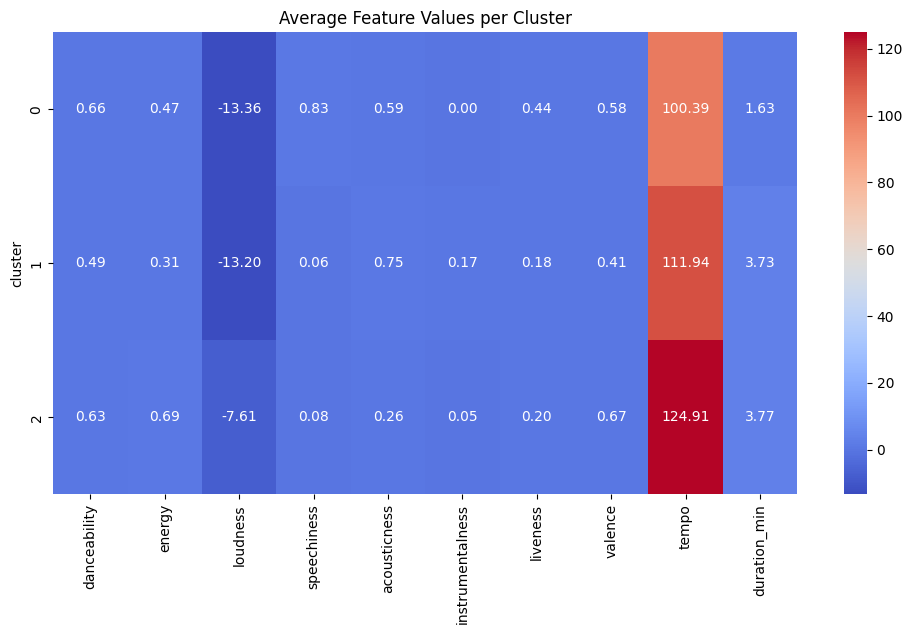

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\3000239923.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


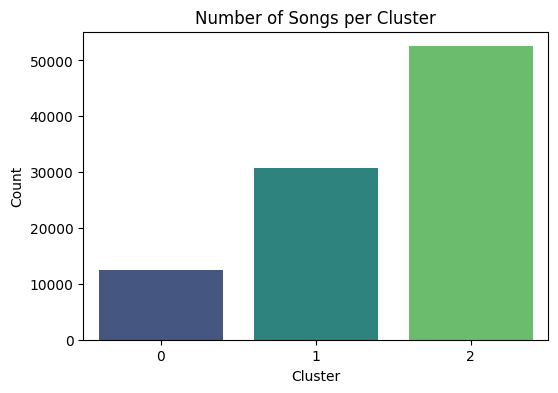


Cluster sizes:
cluster
0    12514
1    30815
2    52508
Name: count, dtype: int64


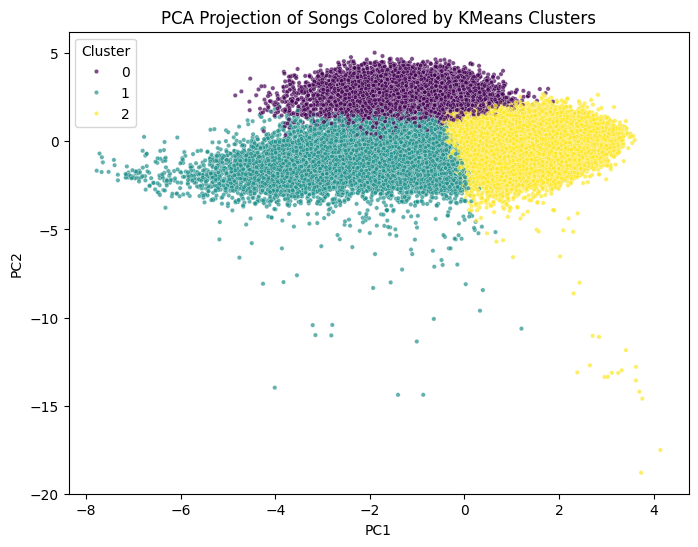


=== Cluster Interpretation Suggestions ===

Cluster 0:
   → Dominant Features: ['tempo']

Cluster 1:
   → Dominant Features: ['tempo']

Cluster 2:
   → Dominant Features: ['tempo']

✅ Cluster summary saved as 'cluster_feature_summary.csv'


In [38]:
# === Cluster Summary: Feature Means per Cluster ===
cluster_summary = df.groupby('cluster')[features].mean().reset_index()
print("\n=== Cluster Feature Means ===")
print(cluster_summary)

# === Visualize Cluster Profiles with Heatmap ===
plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary.set_index('cluster'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Average Feature Values per Cluster")
plt.show()

# === Cluster Sizes ===
cluster_counts = df['cluster'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title("Number of Songs per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

print("\nCluster sizes:")
print(cluster_counts)


# === PCA Visualization of Clusters ===
pca = PCA(n_components=2,random_state=42)
x_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df['cluster'],palette='viridis',s=10,alpha=0.7) # hue is for color by cluster labels
plt.title("PCA Projection of Songs Colored by KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster',loc='best')
plt.show()

# ===  Interpret Cluster Characteristics ===
print("\n=== Cluster Interpretation Suggestions ===")
for c in cluster_summary['cluster']:
    print(f"\nCluster {c}:")
    top_features = cluster_summary.loc[cluster_summary['cluster']==c, features].T
    top_features = top_features[top_features[c] > top_features[c].mean()].sort_values(by=c, ascending=False)
    print("   → Dominant Features:", list(top_features.index[:3]))

# === Save Cluster Profiles for Report ===
cluster_summary.to_csv("cluster_feature_summary.csv", index=False)
print("\n✅ Cluster summary saved as 'cluster_feature_summary.csv'")

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


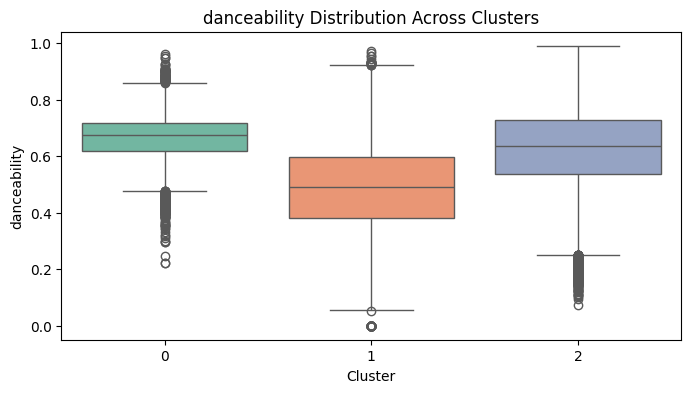

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


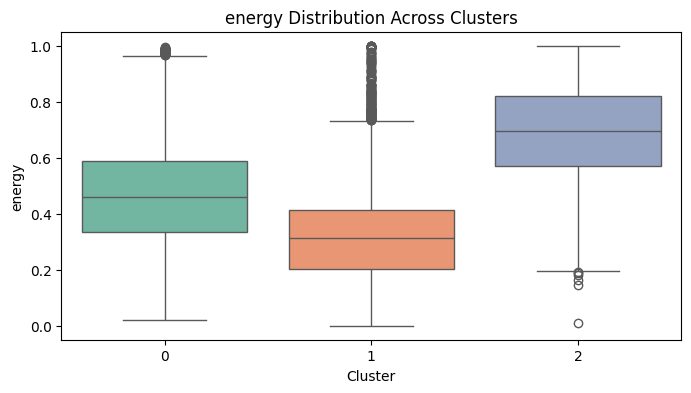

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


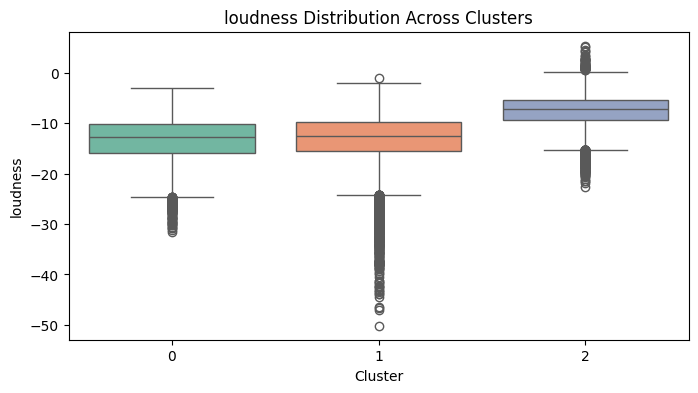

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


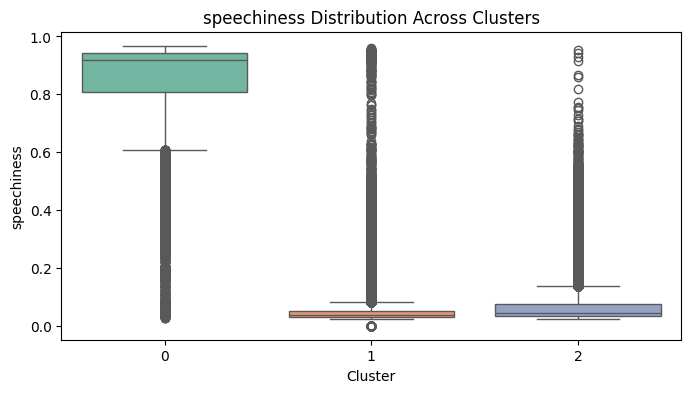

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


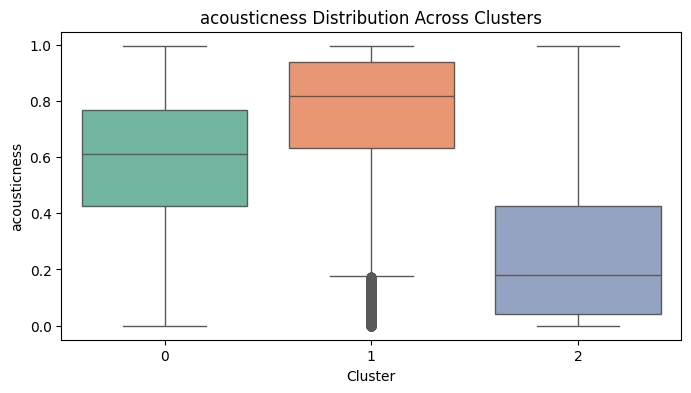

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


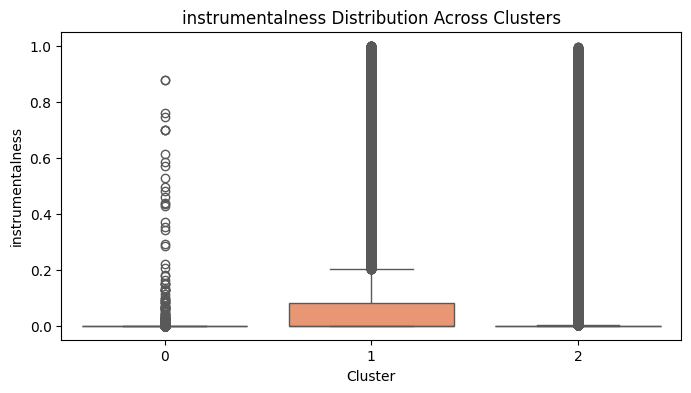

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


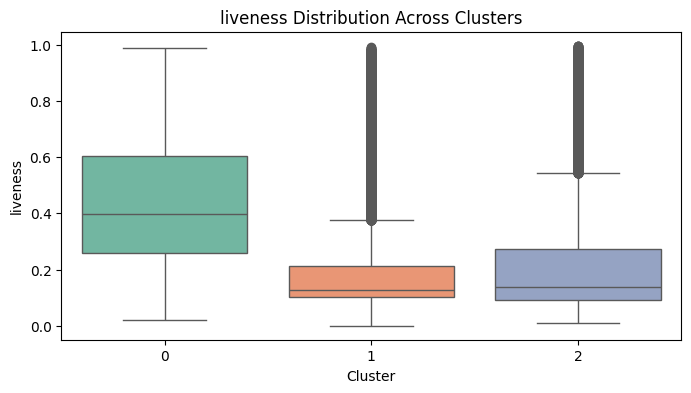

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


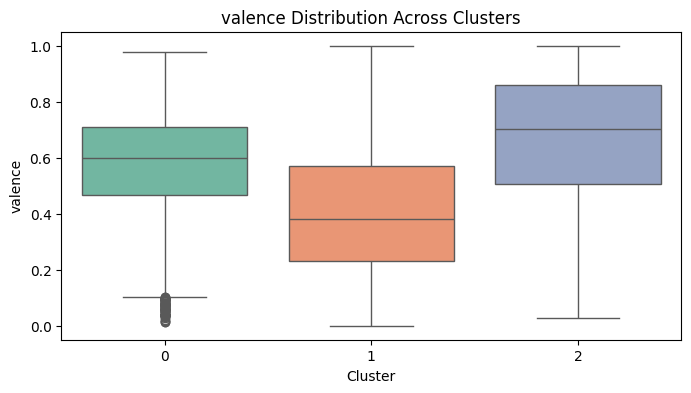

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


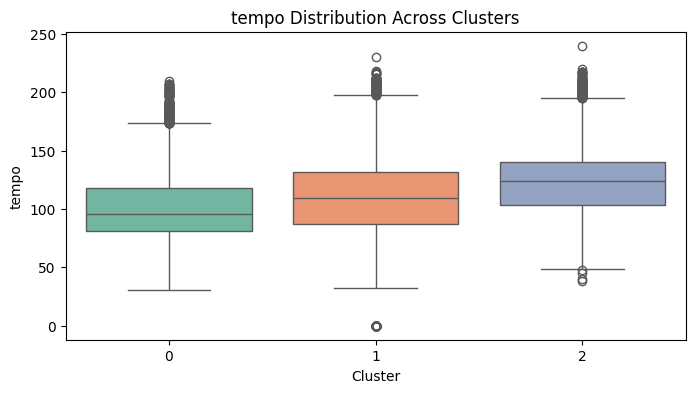

C:\Users\gayat\AppData\Local\Temp\ipykernel_2804\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


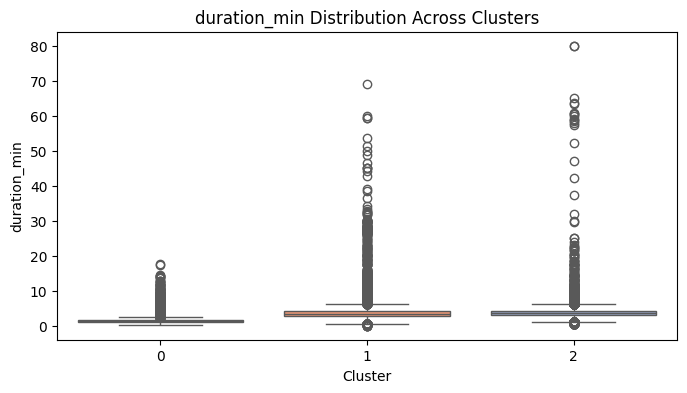

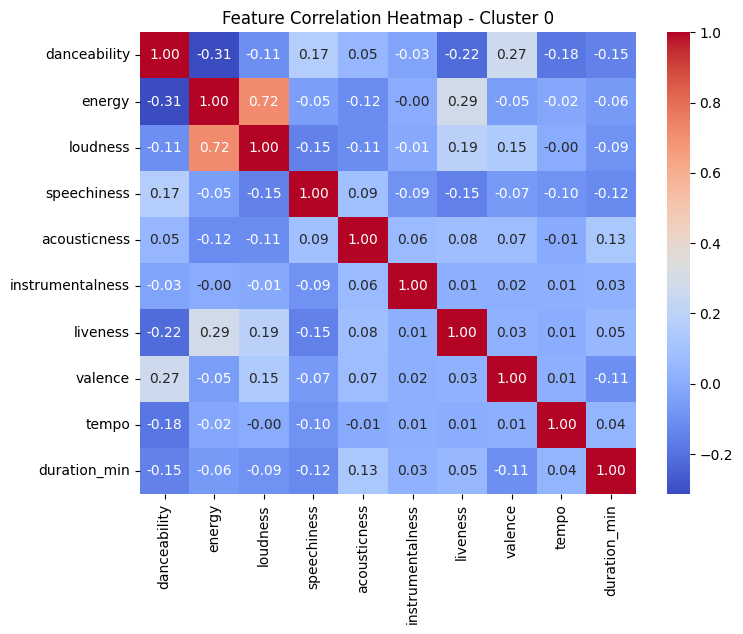

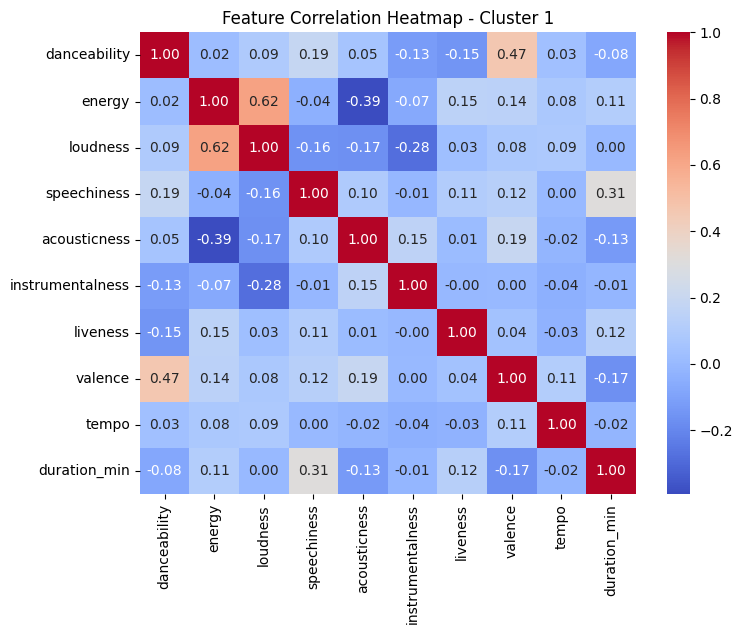

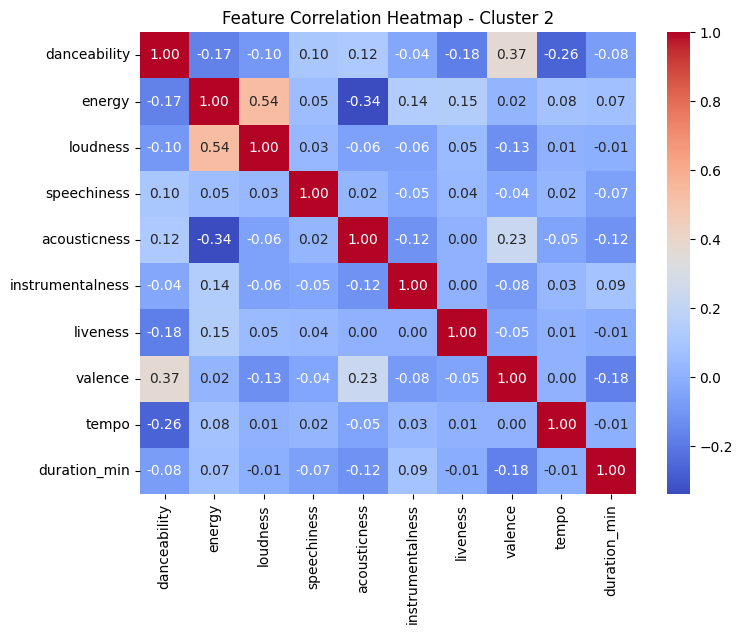


=== Cluster Interpretation Summary ===
   Cluster                               Song Type  \
0        0       🎤 Rap / Live / Spoken-Word Tracks   
1        1     🎶 Acoustic / Soft / Emotional Songs   
2        2  🎧 Energetic / Dance Pop / Happy Tracks   

                                         Description  
0  High speechiness, medium energy, high liveness...  
1  High acousticness, low energy & valence → chil...  
2  High energy, loudness, valence, and danceabili...  

✅ Cluster interpretation summary saved as 'cluster_interpretation_summary.csv'


In [39]:
#  Distribution plots for each feature by cluster
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} Distribution Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

#  Correlation Heatmap by Cluster
for c in sorted(df['cluster'].unique()):
    plt.figure(figsize=(8,6))
    subset = df[df['cluster'] == c][features]
    sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Feature Correlation Heatmap - Cluster {c}")
    plt.show()

# The final interpretation from the box plot 
cluster_interpretation = pd.DataFrame({
    "Cluster": [0, 1, 2],
    "Song Type": [
        "🎤 Rap / Live / Spoken-Word Tracks",
        "🎶 Acoustic / Soft / Emotional Songs",
        "🎧 Energetic / Dance Pop / Happy Tracks"
    ],
    "Description": [
        "High speechiness, medium energy, high liveness → resembles hip-hop, rap, or live talk-style songs.",
        "High acousticness, low energy & valence → chill, calm, or emotional tracks.",
        "High energy, loudness, valence, and danceability → upbeat pop, EDM, or workout music."
    ]
})
print("\n=== Cluster Interpretation Summary ===")
print(cluster_interpretation)
# save interpretation summary
cluster_interpretation.to_csv("cluster_interpretation_summary.csv", index=False)
print("\n✅ Cluster interpretation summary saved as 'cluster_interpretation_summary.csv'")

In [ ]:
'''
“This applies the final KMeans model with 3 clusters to my scaled dataset. 
The fit_predict() function both trains the model and assigns each data point to one of the three clusters. 
I then store those cluster labels in a new column called cluster in my dataframe, so I can analyze, visualize, 
and save the final clustering results.”
'''

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


#“This code trains the final KMeans model with 3 clusters and adds the resulting cluster labels to my dataset 
# for further analysis.”

In [ ]:
print(df.groupby('cluster')[features].mean())

'''
“I calculated the mean of each audio feature for every cluster to understand the musical characteristics of each group. 
Cluster 0 contains calm and acoustic songs, Cluster 1 contains energetic and upbeat pop/dance tracks, 
and Cluster 2 contains speech-heavy songs like rap or spoken word. 
This interpretation helps me label the clusters meaningfully and understand what type of music each cluster represents.”
'''

         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.486242  0.311018 -13.208988     0.060103      0.749539   
1            0.627309  0.693465  -7.608616     0.075061      0.258713   
2            0.664254  0.466617 -13.364383     0.829908      0.585922   

         instrumentalness  liveness   valence       tempo  duration_min  
cluster                                                                  
0                0.168760  0.182065  0.413047  111.933323      3.725015  
1                0.050681  0.199854  0.666324  124.905464      3.776137  
2                0.001384  0.435498  0.584036  100.387090      1.625372  


In [19]:
print(df.groupby('cluster')['genres'].agg(lambda x: x.mode()[0]))

cluster
0    ['vintage taiwan pop']
1                        []
2             ['hoerspiel']
Name: genres, dtype: object


In [20]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [42]:
df.to_csv('single_genre_artists.csv', index=False)


In [24]:
print(df['cluster'].value_counts(normalize=True).map(lambda x: f"{x:.1%}"))

cluster
1    54.8%
0    32.1%
2    13.1%
Name: proportion, dtype: object


In [43]:
print(df[features].head())


   danceability  energy  loudness  speechiness  acousticness  \
0         0.563   0.184   -13.757       0.0512         0.993   
1         0.427   0.180   -15.375       0.0670         0.989   
2         0.511   0.206   -15.514       0.0592         0.995   
3         0.676   0.467   -12.393       0.1650         0.991   
4         0.650   0.298   -13.806       0.1380         0.991   

   instrumentalness  liveness  valence    tempo  duration_min  
0          0.000016     0.325    0.654  133.088      2.690450  
1          0.000000     0.128    0.431   78.459      3.724000  
2          0.000000     0.418    0.481   70.443      3.471117  
3          0.000000     0.219    0.726  129.775      2.698883  
4          0.000000     0.373    0.844   75.950      2.799550  


In [25]:
df['genres'] = df['genres'].str.lower().str.strip()

In [27]:
df['name_song'] = df['name_song'].str.strip()
df['name_artists'] = df['name_artists'].str.strip()

df['name_song'] = df['name_song'].str.title()  # Capitalize each word
df['name_artists'] = df['name_artists'].str.title()

import re

df['name_song'] = df['name_song'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['name_artists'] = df['name_artists'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

df['name_song'] = df['name_song'].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))
df['name_artists'] = df['name_artists'].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))


KeyError: 'name_song'